---
# **RUN on dataset**
---

In [12]:
from pyVHR.analysis.pipeline import Pipeline
from pyVHR.analysis.stats import StatAnalysis
from pyVHR.plot.visualize import *
import os
import pandas as pd
import plotly.express as px
from numpy import round as r
import plotly.io as pio

# set the right renderer for plotly: 'jupyterlab', 'colab', etc
pio.renderers.default = 'jupyterlab'

# main functions 

def ANALYSIS(dataset, approach, metrics=['MAE'], j_data=False, writeFile=False):
  """Print boxplot analysis"""

  cd = os.getcwd() # current dir
  if not j_data:
    print('## Dataset: ' + dataset)
    print('   Approach: ' + approach)
    path = path_results + dataset + "_" + approach + ".h5"
    print('   h5      :', path)
    cfg = path_results + dataset + "_" + approach + ".cfg"
    print('   cfg     :', cfg, end='\n\n')
  else:
    print('## Path dir: ' + dataset)
    print('   Approach: ' + approach)
    path = path_results + dataset 
    print('   path  = ', path)

  filenameH5 = os.path.join(cd, path)
  
  # boxplot
  for m in metrics:
    st = StatAnalysis(filenameH5, join_data=j_data)
    if m=='MAE': 
      scale = 'log' 
    else: 
      scale = 'linear'
    fig = st.displayBoxPlot(metric=m, scale=scale)
    fig.show()
    if writeFile:
      filenamePNG = path_results + dataset + "_" + approach + "_" + m + "_MAE.png"
      fig.write_image(filenamePNG)  

def STATS(dataset, approach='clustering'):
  """Do stats analysis"""
  
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + approach + ".h5"
  df = pd.read_hdf(os.path.join(cd, path))

  # compute errors
  MAE_mean, MAE_std, MAE_median =    r(df['MAE'].mean()[0],2),  r(df['MAE'].std(),2),  r(df['MAE'].median(),2)
  RMSE_mean, RMSE_std, RMSE_median = r(df['RMSE'].mean()[0],2), r(df['RMSE'].std(),2), r(df['RMSE'].median(),2)
  PCC_mean, PCC_std, PCC_median =    r(df['PCC'].mean()[0],2),  r(df['PCC'].std(),2),  r(df['PCC'].median(),2)
  CCC_mean, CCC_std, CCC_median =    r(df['CCC'].mean()[0],2),  r(df['CCC'].std(),2),  r(df['CCC'].median(),2)
  SNR_mean, SNR_std, SNR_median =    r(df['SNR'].mean()[0],2),  r(df['SNR'].std(),2),  r(df['SNR'].median(),2)
  MAX_mean, MAX_std, MAX_median =    r(df['MAX'].mean()[0],2),  r(df['MAX'].std(),2),  r(df['MAX'].median(),2)

 # print table 
  table = [[MAE_mean, MAE_std, MAE_median], [RMSE_mean, RMSE_std, RMSE_median], [PCC_mean, PCC_std, PCC_median],
           [CCC_mean, CCC_std, CCC_median], [SNR_mean, SNR_std, SNR_median], [MAX_mean, MAX_std, MAX_median]]
  stats = pd.DataFrame(table, columns = [ 'MEANS', 'STD', 'MEDIANS'], index=['MAE', 'RMSE', 'PCC', 'CCC', 'SNR', 'MAX'])
  print('\n** Stats table **')
  print(stats)


def RUN(dataset, method):
  """Run methods on a dataset"""

  # set paths
  print('## Dataset: ' + dataset)
  print('Using...')
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + method + ".h5"
  print('   filename h5: ', path)
  cfg = path_results + dataset + "_" + method + ".cfg"
  print('   cfg        :', cfg)
  print('\n')

  # pipeline
  pl = Pipeline()
  res = pl.run_on_dataset(os.path.join(cd, cfg), verb=1)
  res.saveResults(filenameH5)
  print('Written file: ' + filenameH5 + '\n\n')

def DETAILS(dataset, method, metric='MAE'):
  """Show performance details on each video of the dataset"""

  # set paths
  cd = os.getcwd() # current dir
  path = path_results + dataset + "_" + method + ".h5"
  print('## Dataset: ' + dataset)
  print('   filename h5: ', path)
  df = pd.read_hdf(os.path.join(cd, path))
  datasetname = df['dataset'][0].upper()
  methods = set(list(df['method']))

  # loop on methods
  for m in methods:
    print('   method     :', m)
    vals = df[df['method'] == m][metric]
    fvideos = df[df['method'] == m]['videoFilename']
    x = []
    y = []
    for i in vals.index:
      n = fvideos[i]
      n = n[n.rfind('/', 0, n.rfind('/'))+1:n.rfind('/')]
      x.append(n)
      y.append(vals[i][0])
    fig = px.bar(x=x, y=y, title='dataset: ' + datasetname + ' method: ' + m)
    fig.update_xaxes(type='category')
    fig.show()

This notebook shows the complete **pipeline** that takes a **dataset** as input and computes an **estimation** of **BPMs** using a prespecified set of **rPPG** **methods**.

Below are the possible choices for the methods.
* **Methods**: `cpu_CHROM`, `cupy_CHROM`, `torch_CHROM`, `cpu_LGI`, `cpu_POS`, `cupy_POS`, `cpu_PBV`, `cpu_PCA`, `cpu_GREEN`, `cpu_OMIT`, `cpu_ICA`, `cpu_SSR`

Below are the possible choices for the datasets.
* **Datasets**: `PURE`, `UBFC1`, `UBFC2`, `ECG_Fitness_01-1`, `ECG_Fitness_01-2`... `ECG_Fitness_06-1`, `ECG_Fitness_06-2`

# Runs

In [13]:
# run on dataset

path_results = "results/cfg/" # general path for cfg

#dataset = 'PURE'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'UBFC1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'UBFC2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'LGI_PPGI'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_01-1'   FIN
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_01-2'   
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_02-1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_02-2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_03-1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_03-2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_04-1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_04-2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_05-1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_05-2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_06-1'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

#dataset = 'ECG_Fitness_06-2'
#RUN(dataset, 'holistic')
#RUN(dataset, 'median')
#RUN(dataset, 'clustering')

# Analisys

## Dataset: PURE
   Approach: holistic
   h5      : ../results/h5/PURE_holistic.h5
   cfg     : ../results/h5/PURE_holistic.cfg



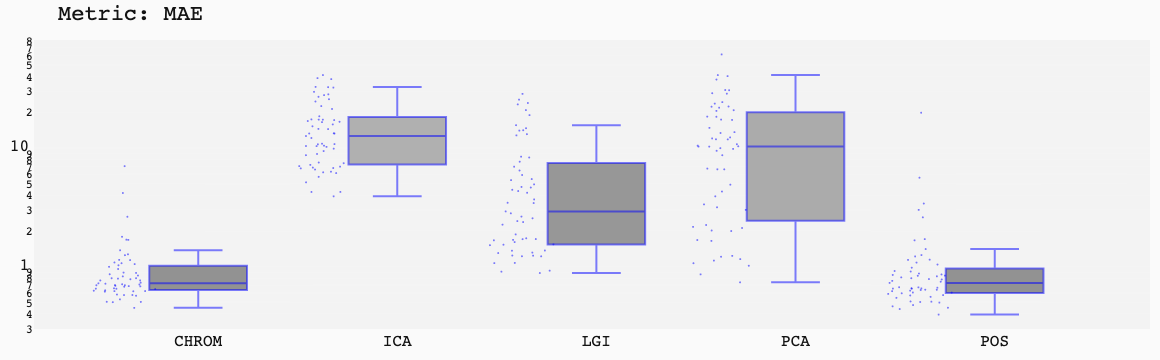


** Stats table **
      MEANS    STD  MEDIANS
MAE    7.37   9.75     2.24
RMSE  12.35  15.08     4.10
PCC    0.47   0.44     0.43
CCC    0.43   0.42     0.29
SNR    5.30   4.95     5.38
MAX   42.73  48.57    19.81


In [14]:
## -- Holistic

path_results = "../results/h5/" # general path for cfg# general path for data

dataset = 'PURE'
ANALYSIS(dataset, 'holistic', metrics=['MAE'])
STATS(dataset, approach='holistic')

## Dataset: PURE
   Approach: median
   h5      : ../results/h5/PURE_median.h5
   cfg     : ../results/h5/PURE_median.cfg



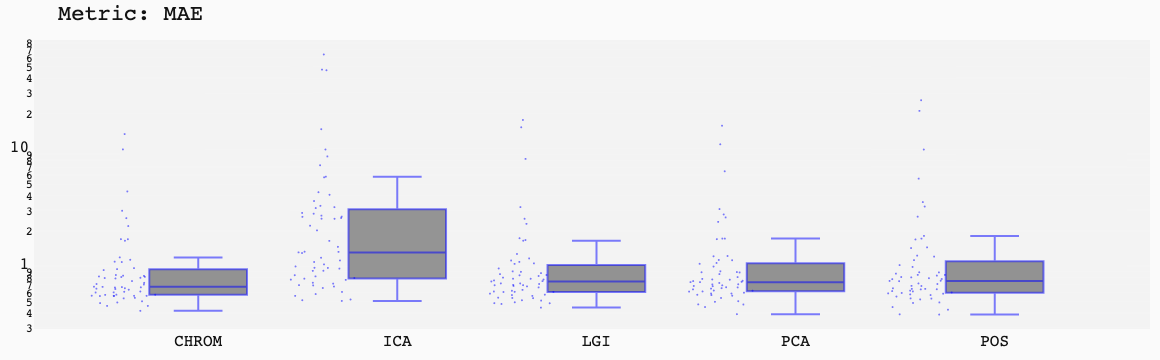


** Stats table **
      MEANS    STD  MEDIANS
MAE    2.21   6.00     0.78
RMSE   3.23   7.97     0.97
PCC    0.79   0.31     0.93
CCC    0.75   0.30     0.88
SNR    2.12   3.00     2.31
MAX    8.80  18.11     2.69


In [15]:
## -- Median
ANALYSIS(dataset, 'median', metrics=['MAE'])
STATS(dataset, approach='median')

## Dataset: PURE
   Approach: clustering
   h5      : ../results/h5/PURE_clustering.h5
   cfg     : ../results/h5/PURE_clustering.cfg



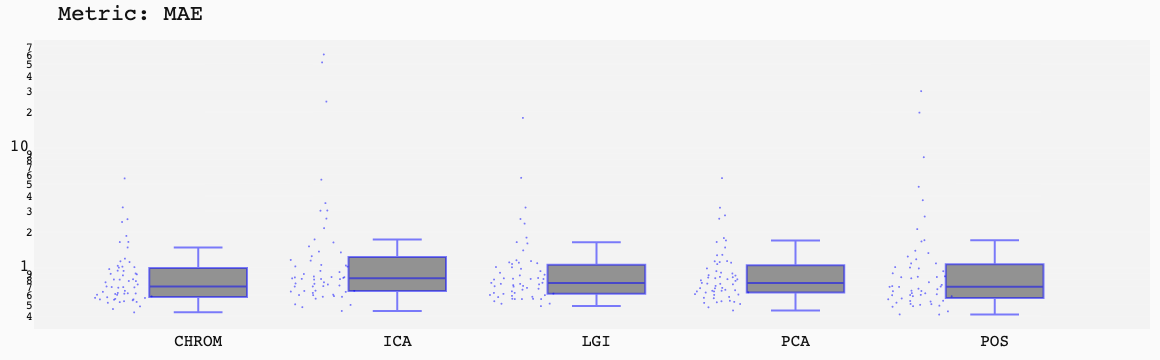


** Stats table **
      MEANS    STD  MEDIANS
MAE    1.70   5.26     0.75
RMSE   2.56   7.72     0.92
PCC    0.84   0.26     0.94
CCC    0.80   0.25     0.89
SNR    2.12   3.00     2.31
MAX    6.72  16.48     2.58


In [16]:
## -- Clustering
ANALYSIS(dataset, 'clustering', metrics=['MAE'])
STATS(dataset, approach='clustering')

## Dataset: PURE
   Approach: deep
   h5      : ../results/h5/PURE_deep.h5
   cfg     : ../results/h5/PURE_deep.cfg



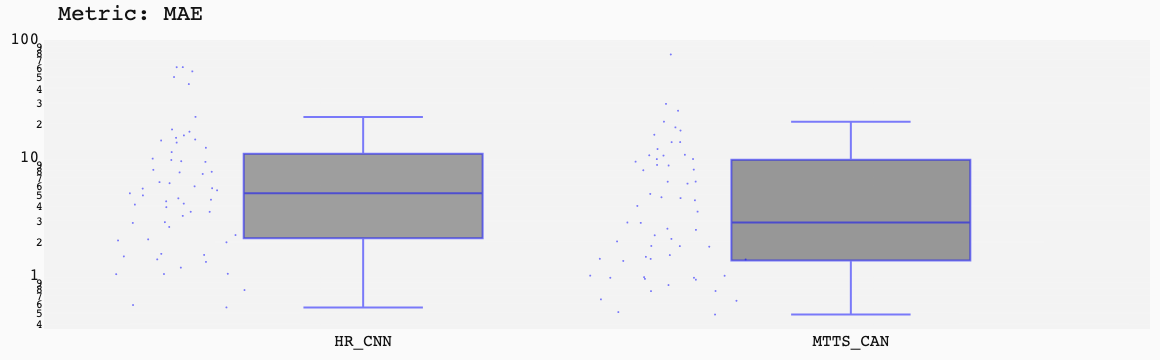


** Stats table **
      MEANS    STD  MEDIANS
MAE    8.81  13.04     4.52
RMSE  12.48  15.04     7.71
PCC    0.33   0.37     0.25
CCC    0.27   0.35     0.10
SNR    2.83   4.50     2.81
MAX   31.66  26.64    26.36


In [17]:
## -- Deep 
ANALYSIS(dataset, 'deep', metrics=['MAE'])
STATS(dataset, approach='deep')

# Details

## Dataset: PURE
   filename h5:  ../results/h5/PURE_holistic.h5
   method     : ICA


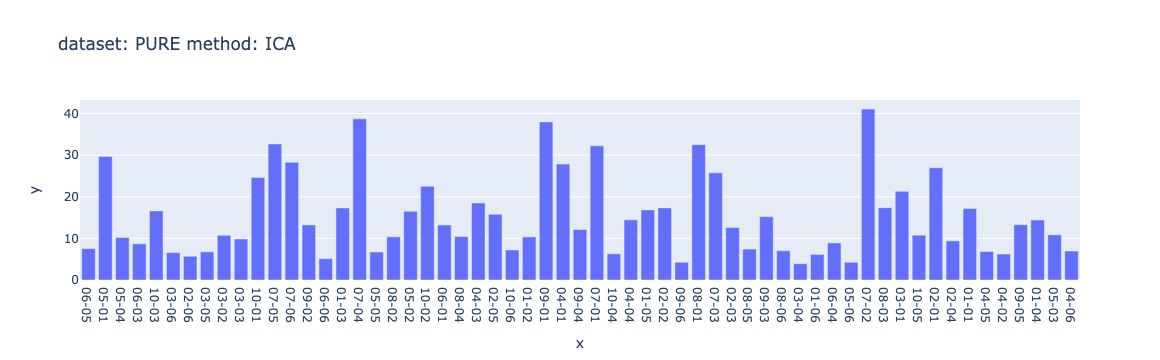

   method     : PCA


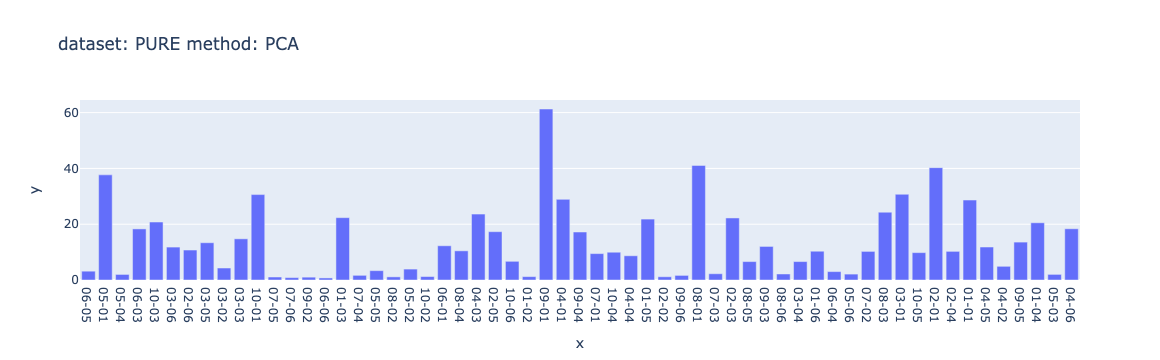

   method     : POS


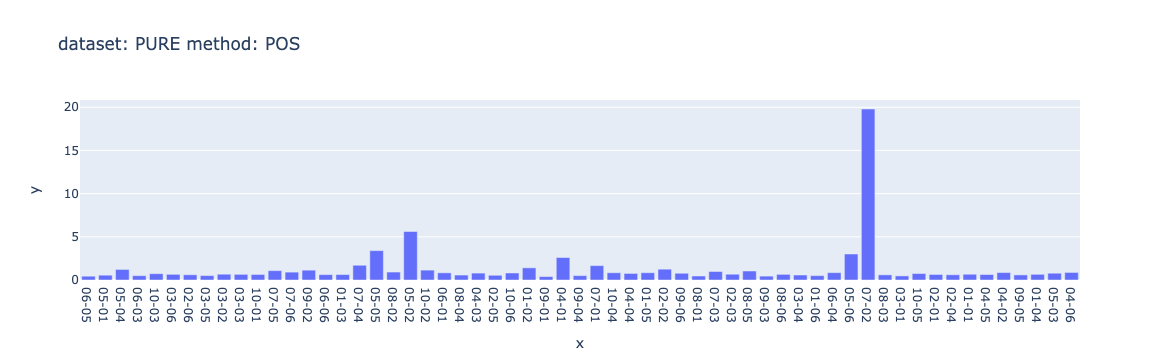

   method     : CHROM


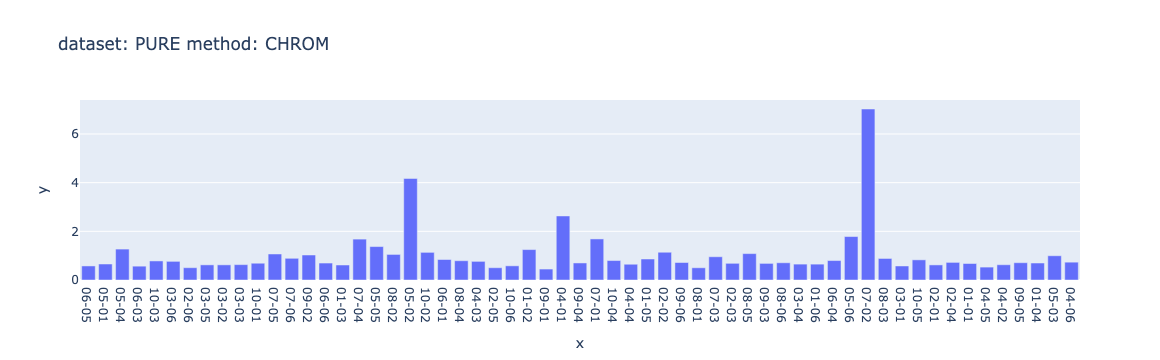

   method     : LGI


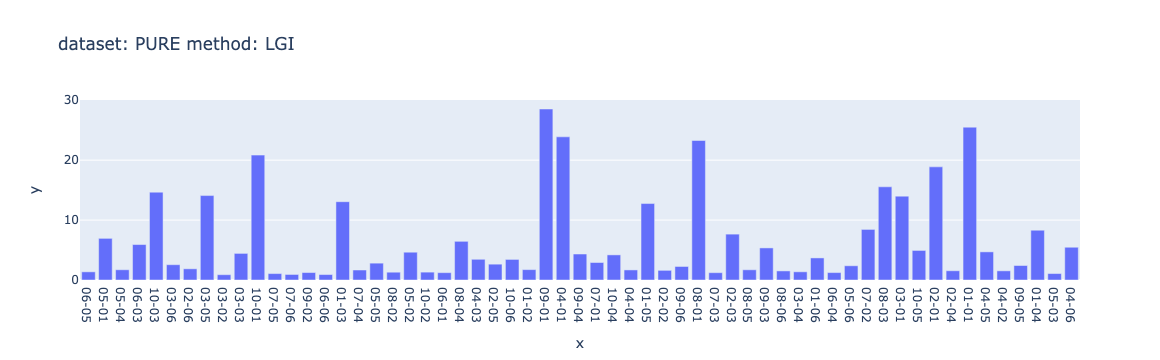

In [18]:
# holistic

method = 'holistic'
DETAILS(dataset, method, metric='MAE')

## Dataset: PURE
   filename h5:  ../results/h5/PURE_median.h5
   method     : ICA


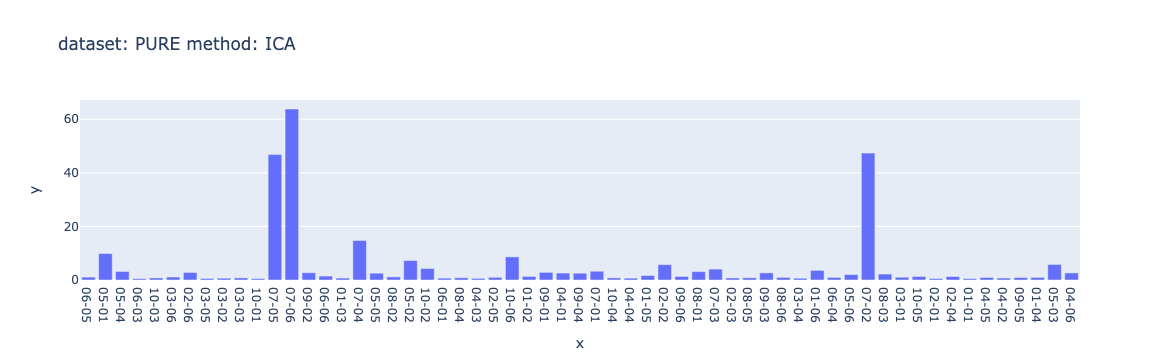

   method     : PCA


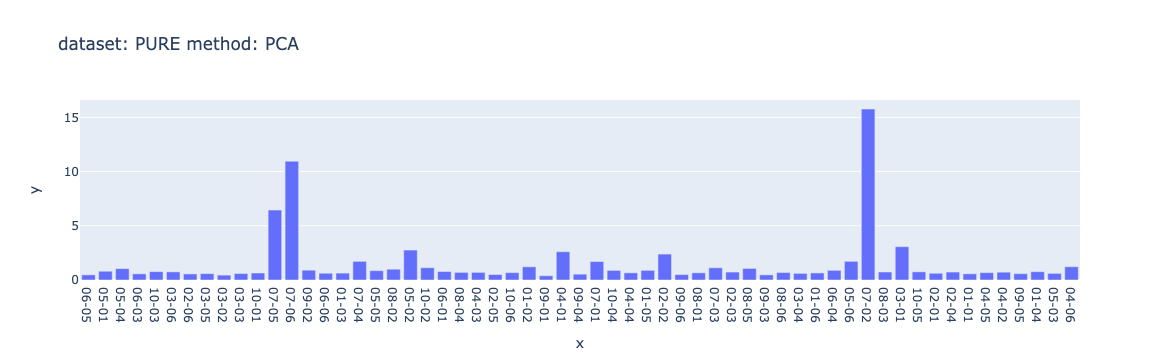

   method     : POS


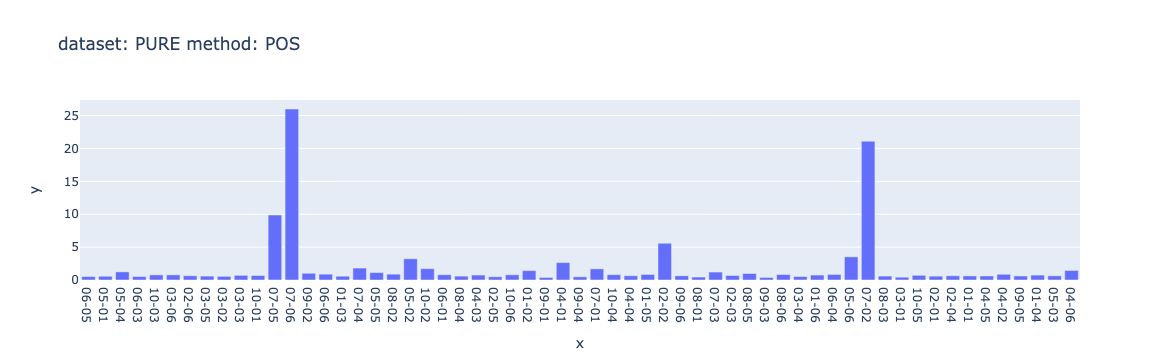

   method     : CHROM


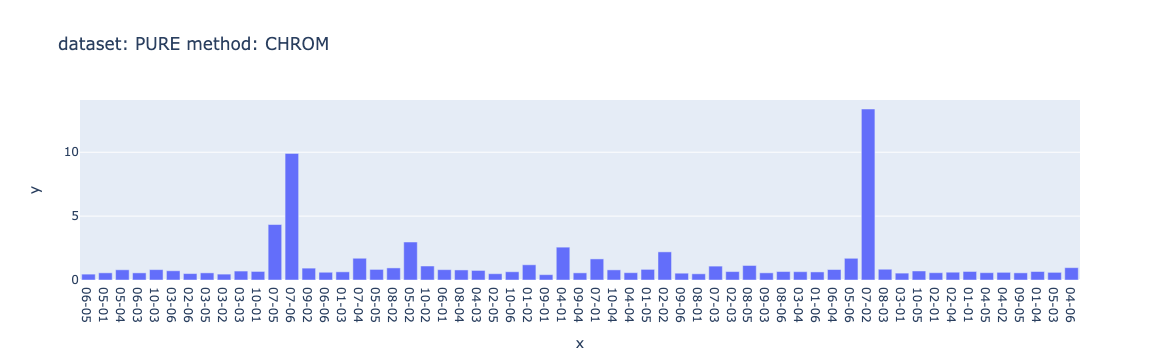

   method     : LGI


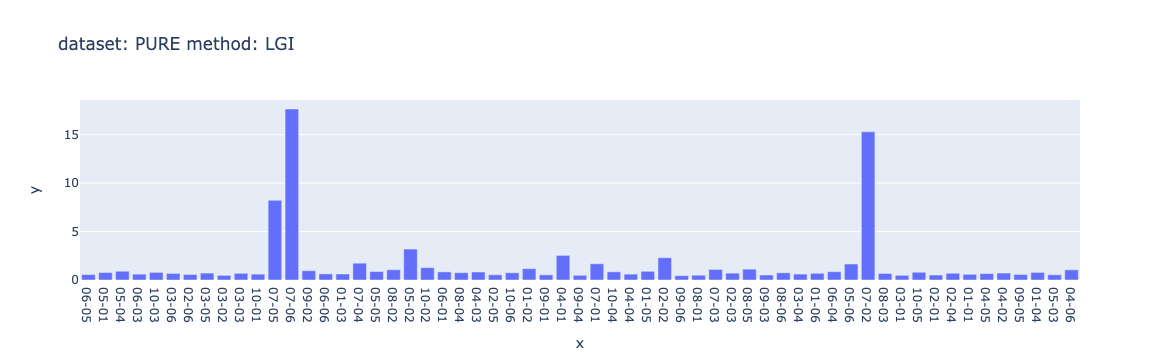

In [19]:
# median
metric='MAE'
method = 'median'
DETAILS(dataset, method, metric)

## Dataset: PURE
   filename h5:  ../results/h5/PURE_clustering.h5
   method     : ICA


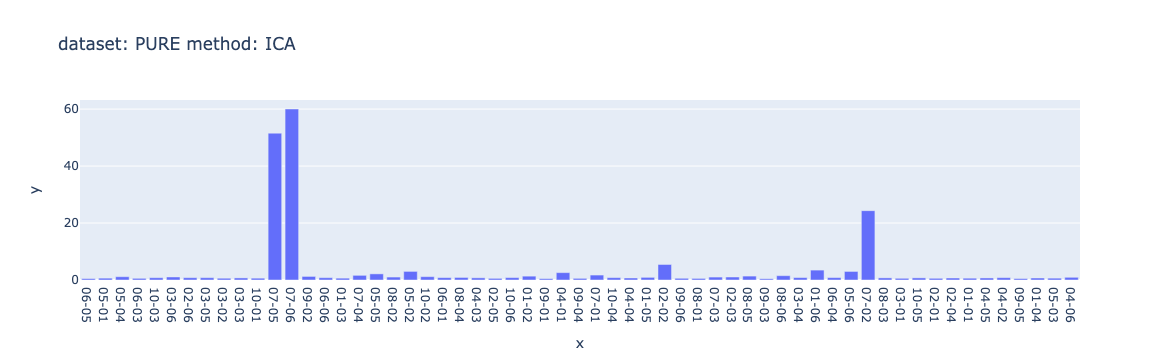

   method     : PCA


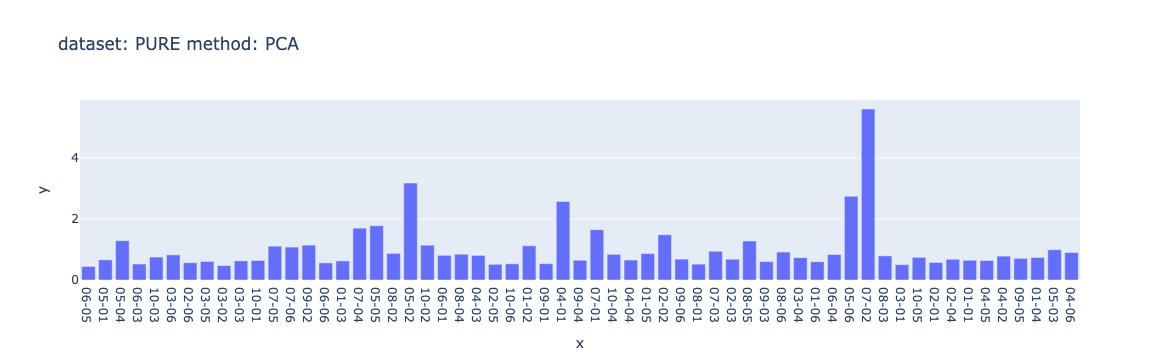

   method     : POS


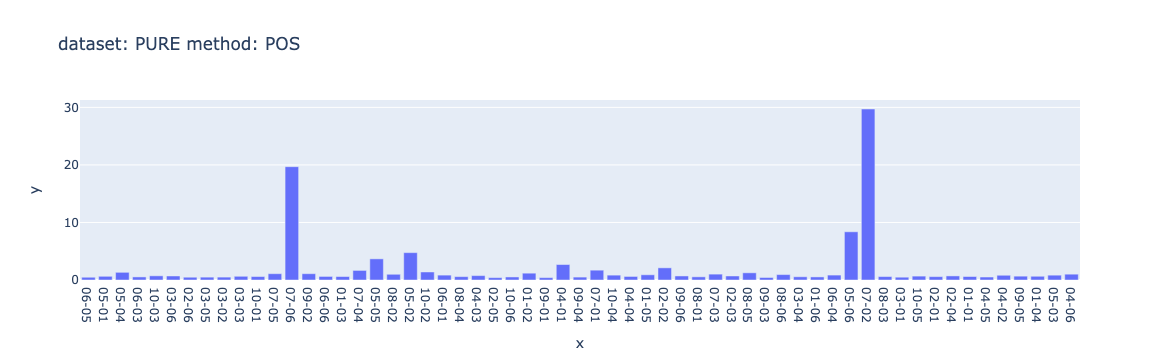

   method     : CHROM


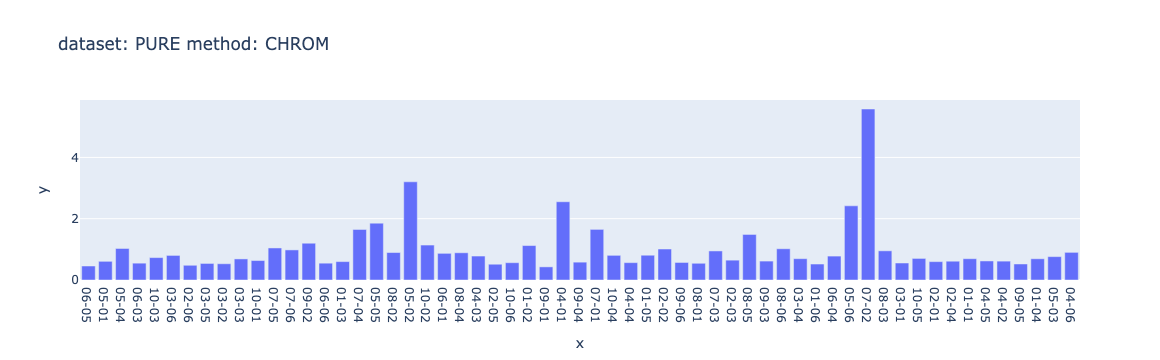

   method     : LGI


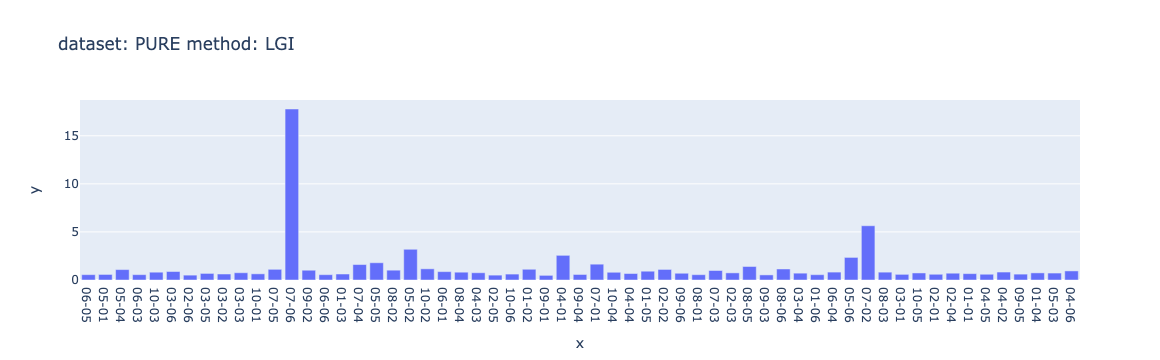

In [20]:
# clustering
metric='MAE'
method = 'clustering'
DETAILS(dataset, method, metric)

# Multidataset

In [21]:
# multi dataset
#path = path_results + 'h5_collection'
#st = StatAnalysis(path, join_data=True)
#fig = st.displayBoxPlot(metric='PCC')
#fig.show(renderer = "colab")
